### Testing selection procedure using HIV dataset

#### Import, data preprocessing and model training

In [1]:
from DeepPurpose import utils, dataset, CompoundPred
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import numpy as np
import os
import sys
import pandas as pd
import torch
from matplotlib import pyplot as plt

torch.cuda.is_available()

True

In [121]:
X_drugs, y, drugs_index = dataset.load_HIV(path = './data')
drug_encoding = 'Morgan'

Dataset already downloaded in the local system...


In [122]:
n = len(y)
reind = np.random.permutation(n)
X_drugs_train = X_drugs[reind[0:int(n*0.4+1)]]
y_train = y[reind[0:int(n*0.4+1)]]
X_drugs_other = X_drugs[reind[int(1+n*0.4):n]]
y_other = y[reind[int(1+n*0.4):n]]

In [123]:
ttrain, tval, ttest = utils.data_process(X_drug = X_drugs_train, y = y_train, 
                                         drug_encoding = drug_encoding,
                                         split_method='random', frac=[0.7, 0.1, 0.2],
                                         random_seed = 42)

Drug Property Prediction Mode...
in total: 16451 drugs
encoding drug...
unique drugs: 16451


[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerator
[17:48:30] DEPRECATION WARNING: please use MorganGenerat

Done.


[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerator
[17:48:33] DEPRECATION WARNING: please use MorganGenerat

In [124]:
dother = utils.data_process(X_drug = X_drugs_other, y = y_other, 
                                     drug_encoding = drug_encoding,
                                     split_method= 'no_split',
                                     random_seed = 42)

Drug Property Prediction Mode...
in total: 24676 drugs
encoding drug...
unique drugs: 24676


[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerator
[17:48:34] DEPRECATION WARNING: please use MorganGenerat

do not do train/test split on the data for already splitted data


[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerator
[17:48:39] DEPRECATION WARNING: please use MorganGenerat

In [125]:
dother['drug_encoding']

0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
24671    [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
24672    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
24673    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
24674    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
24675    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: drug_encoding, Length: 24676, dtype: object

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68062. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.70090 , AUPRC: 0.19511 , F1: 0.12121
Training at Epoch 2 iteration 0 with loss 0.14338. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.71907 , AUPRC: 0.20641 , F1: 0.25316
Training at Epoch 3 iteration 0 with loss 0.14432. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.72479 , AUPRC: 0.21654 , F1: 0.21212
--- Go for Testing ---
Testing AUROC: 0.7194020586831626 , AUPRC: 0.3287796095559026 , F1: 0.3006535947712418
--- Training Finished ---
predicting...
predicting...


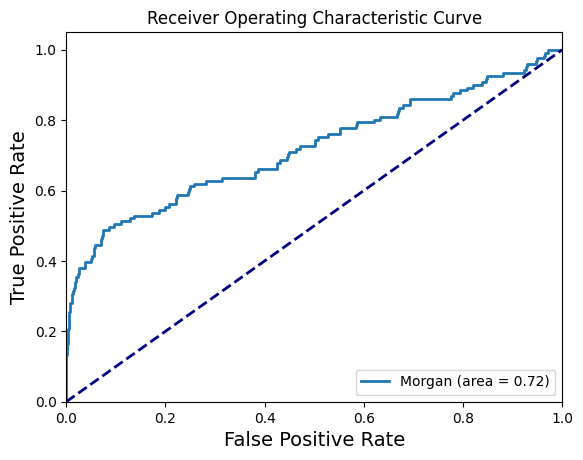

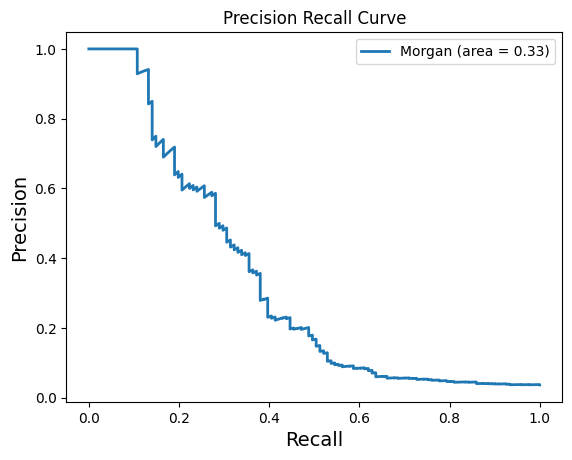

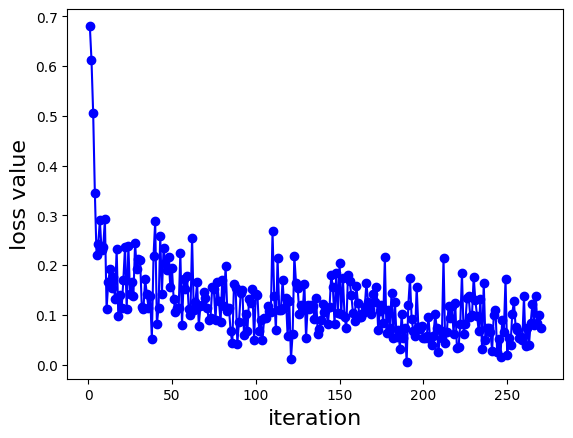

In [138]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                       cls_hidden_dims = [1024, 1024, 512], 
                       train_epoch = 3, 
                       LR = 0.001, 
                       batch_size = 128,
                       hidden_dim_drug = 128
                      )
model = CompoundPred.model_initialize(**config)
model.train(ttrain, tval, ttest)

all_pred = np.array(model.predict(dother))
train_pred = np.array(model.predict(ttrain))

In [139]:
np.sort(all_pred)

array([1.93397118e-05, 3.75671334e-05, 5.23501767e-05, ...,
       9.98025060e-01, 9.98803258e-01, 9.98966455e-01])

#### Computing calibration set split (with covariate shift) and conformity scores

In [157]:
def single_select(calib_scores, test_scores, q = 0.1):
    ntest = len(test_scores)
    ncalib = len(calib_scores)
    pvals = np.zeros(ntest)

    for j in range(ntest):
        pvals[j] = (np.sum(calib_scores < test_scores[j]) + np.random.uniform(size=1)[0] * (np.sum(calib_scores == test_scores[j]) + 1)) / (ncalib+1)

    idxs = [j for j in range(ntest) if pvals[j] <= q]
    return np.array(idxs), pvals

def bonf_select(calib_scores, test_scores, q = 0.1):
    ntest = len(test_scores)
    ncalib = len(calib_scores)
    pvals = np.zeros(ntest)

    for j in range(ntest):
        pvals[j] = (np.sum(calib_scores < test_scores[j]) + np.random.uniform(size=1)[0] * (np.sum(calib_scores == test_scores[j]) + 1)) / (ncalib+1)

    idxs = [j for j in range(ntest) if pvals[j] <= q / ntest]
    return np.array(idxs), pvals

def conformal_select(calib_scores, test_scores, q = 0.1):
    ntest = len(test_scores)
    ncalib = len(calib_scores)
    pvals = np.zeros(ntest)

    for j in range(ntest):
        pvals[j] = (np.sum(calib_scores < test_scores[j]) + np.random.uniform(size=1)[0] * (np.sum(calib_scores == test_scores[j]) + 1)) / (ncalib+1)
    
    # BH(q) 
    df_test = pd.DataFrame({"id": range(ntest), "pval": pvals, "scores": test_scores}).sort_values(by='pval')
    
    df_test['threshold'] = q * np.linspace(1, ntest, num=ntest) / ntest 
    idx_smaller = [j for j in range(ntest) if df_test.iloc[j,1] <= df_test.iloc[j,3]]
     
    if len(idx_smaller) == 0:
        return np.array([]), pvals
    else:
        idx_sel = np.array(df_test.index[range(np.max(idx_smaller))])
        s_th = df_test.iloc[idx_smaller, 3]
        return idx_sel, pvals

def eval_sel(sel_idx, ys, cs):
    if len(sel_idx) == 0:
        fdp = 0
        power = 0
    else:
        fdp = np.sum(ys[sel_idx] <= cs[sel_idx]) / len(sel_idx)
        power = np.sum(ys[sel_idx] > cs[sel_idx]) / sum(ys > cs) 
    return fdp, power, len(sel_idx)


In [148]:
reind = np.random.permutation(len(dother))

dcalib = dother.iloc[reind[:int(len(dother)*0.5+1)]]
dtest = dother.iloc[reind[int(1+len(dother)*0.5):]]

hat_mu_calib = all_pred[reind[:int(len(dother)*0.5+1)]]
hat_mu_test = all_pred[reind[int(1+len(dother)*0.5):]]

y_calib = np.array(dcalib["Label"])
y_test = np.array(dtest["Label"])

c = 0

calib_scores_res = y_calib - hat_mu_calib
calib_scores_sub = - hat_mu_calib 
calib_scores_clip = 100 * (y_calib > c) + c * (y_calib <= c) - hat_mu_calib

test_scores = c - hat_mu_test

q = 0.5 # nominal level

single, _ = single_select(calib_scores_clip, test_scores, q)
bonf, _ = bonf_select(calib_scores_clip, test_scores, q)
BH_res, _ = conformal_select(calib_scores_res, test_scores, q)  
BH_sub, _ = conformal_select(calib_scores_sub[y_calib <= c], test_scores, q) 
BH_clip, df = conformal_select(calib_scores_clip, test_scores, q)

print(BH_clip)
print(df)

single_fdp, single_power, single_nsel = eval_sel(single, y_test, np.array([c]*len(y_test)))
bonf_fdp, bonf_power, bonf_nsel = eval_sel(bonf, y_test, np.array([c]*len(y_test)))
BH_res_fdp, BH_res_power, BH_res_nsel = eval_sel(BH_res, y_test, np.array([c]*len(y_test)))
BH_sub_fdp, BH_sub_power, BH_sub_nsel = eval_sel(BH_sub, y_test, np.array([c]*len(y_test)))
BH_clip_fdp, BH_clip_power, BH_clip_nsel = eval_sel(BH_clip, y_test, np.array([c]*len(y_test))) 

output_dict = {
    'q': [q], 
    'calib_size': [len(y_calib)], 
    'test_size': [len(y_test)], 
    'single_power': [single_power],
    'single_fdp': [single_fdp],
    'single_nsel': [single_nsel], 
    'bonf_power': [bonf_power],
    'bonf_fdp': [bonf_fdp],
    'bonf_nsel': [bonf_nsel],
    'BH_res_fdp': [BH_res_fdp], 
    'BH_res_power': [BH_res_power], 
    'BH_res_nsel': [BH_res_nsel], 
    'BH_sub_fdp': [BH_sub_fdp], 
    'BH_sub_power': [BH_sub_power], 
    'BH_sub_nsel': [BH_sub_nsel], 
    'BH_clip_fdp': [BH_clip_fdp], 
    'BH_clip_power': [BH_clip_power],
    'BH_clip_nsel': [BH_clip_nsel]
}

output_dict

[ 3577  3344  8947  5271    89  1582 10392 11681  6100  7759  5969  1752
 10683  7669  9261 10431  6252  1507  6955  5716  1204  8372  7980  1278
 11381  4412  5068  5898   994  3905  9311  5288  8424  3356 11675   692
  3353   545  7212  6203  3110 10032  6381  3713  4720  3145  6193   111
  2513  5851  3377 10397  5460  6960  2872  9157  6414  6253 10344  5113
 10608  1145  1153 11300  1111  7624  4253  4603  5322 11530  4662 12118
  6330  6788  3158  2878   320  6502  4014  5550  1764  2699  1125  8235
  5526 11464  8901  2604  2633  2492  2417 11315  6733  5561  9518  5793
  3729   464  8543 10337   509 12016  7640  1241  9926  2248  5363  6715
  2954  6705  5076  8357  1901  9948  7607 11140  2126  7573   693  5855
  4196  3679  9022  9289 10822  2527  1173  4382  9175  5232  5323  6140
  9011  6235  9010   931  2879  6346 10285  8223  2870  4326 11156  4479
  8756  3733  7466  1452 10089  9818  3719  3922  1845 10745  9172  2128
 11050 11009  4118  1840 10642   897 11560  3690  8

{'q': [0.5],
 'calib_size': [12339],
 'test_size': [12337],
 'single_power': [0.8231132075471698],
 'single_fdp': [0.9467825556572126],
 'single_nsel': [6558],
 'bonf_power': [0.018867924528301886],
 'bonf_fdp': [0.0],
 'bonf_nsel': [8],
 'BH_res_fdp': [0.4725274725274725],
 'BH_res_power': [0.33962264150943394],
 'BH_res_nsel': [273],
 'BH_sub_fdp': [0.4664179104477612],
 'BH_sub_power': [0.33726415094339623],
 'BH_sub_nsel': [268],
 'BH_clip_fdp': [0.4725274725274725],
 'BH_clip_power': [0.33962264150943394],
 'BH_clip_nsel': [273]}

#### Result (above are outdated; see HIV.py)

In [152]:
linear = pd.read_csv("..\\csv-HIV\\linear\\itr=100 q=0.5.csv")
linear['regressor'] = 'linear'
linear = linear.groupby('regressor').mean().reset_index().drop(columns=['Unnamed: 0', 'seed'])
linear

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,linear,0.5,0.085285,12339.0,12337.0,0.806917,0.945638,6510.85,0.014231,0.08037,7.05,0.515274,0.346884,318.63,0.498093,0.337684,299.51,0.515278,0.346931,318.63


In [150]:
mlp = pd.read_csv("..\\csv-HIV\\mlp\\hidden=32 layers=3 itr=100 q=0.5.csv")
mlp['regressor'] = 'mlp'
mlp = mlp.groupby('regressor').mean().reset_index().drop(columns=['Unnamed: 0', 'seed'])
mlp

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,mlp,0.5,0.108252,12339.0,12337.0,0.757104,0.948865,6494.0,0.004268,0.15118,2.45,0.486033,0.31549,276.29,0.473703,0.307896,263.86,0.491139,0.319242,282.3


In [161]:
mlp_DP = pd.read_csv("..\\csv-HIV\\mlp_DP\\itr=100 q=0.5.csv")
mlp_DP['regressor'] = 'mlp_DP'
mlp_DP = mlp_DP.groupby('regressor').mean().reset_index().drop(columns=['Unnamed: 0', 'seed'])
mlp_DP

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,mlp_DP,0.5,0.157231,12339.0,12337.0,0.78677,0.946739,6478.59,0.01449,0.074148,6.96,0.500705,0.354521,317.44,0.48471,0.345442,299.36,0.500517,0.354686,317.49


In [151]:
rf = pd.read_csv("..\\csv-HIV\\rf\\n_estim=50 max_depth=30 max_features=sqrt itr=100 q=0.5.csv")
rf['regressor'] = 'rf'
rf = rf.groupby('regressor').mean().reset_index().drop(columns=['Unnamed: 0', 'seed'])
rf

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,rf,0.5,0.231637,12339.0,12337.0,0.814538,0.945259,6526.89,0.013237,0.055356,6.36,0.49609,0.427571,378.1,0.475468,0.413343,350.98,0.496384,0.427531,378.34


In [162]:
all = pd.concat((linear, rf, mlp, mlp_DP))
all

,regressor,q,r_squared,calib_size,test_size,single_power,single_fdp,single_nsel,bonf_power,bonf_fdp,bonf_nsel,BH_res_fdp,BH_res_power,BH_res_nsel,BH_sub_fdp,BH_sub_power,BH_sub_nsel,BH_clip_fdp,BH_clip_power,BH_clip_nsel
0,linear,0.5,0.085285,12339.0,12337.0,0.806917,0.945638,6510.85,0.014231,0.080370,7.05,0.515274,0.346884,318.63,0.498093,0.337684,299.51,0.515278,0.346931,318.63
0,rf,0.5,0.231637,12339.0,12337.0,0.814538,0.945259,6526.89,0.013237,0.055356,6.36,0.496090,0.427571,378.10,0.475468,0.413343,350.98,0.496384,0.427531,378.34
0,mlp,0.5,0.108252,12339.0,12337.0,0.757104,0.948865,6494.00,0.004268,0.151180,2.45,0.486033,0.315490,276.29,0.473703,0.307896,263.86,0.491139,0.319242,282.30
0,mlp_DP,0.5,0.157231,12339.0,12337.0,0.786770,0.946739,6478.59,0.014490,0.074148,6.96,0.500705,0.354521,317.44,0.484710,0.345442,299.36,0.500517,0.354686,317.49


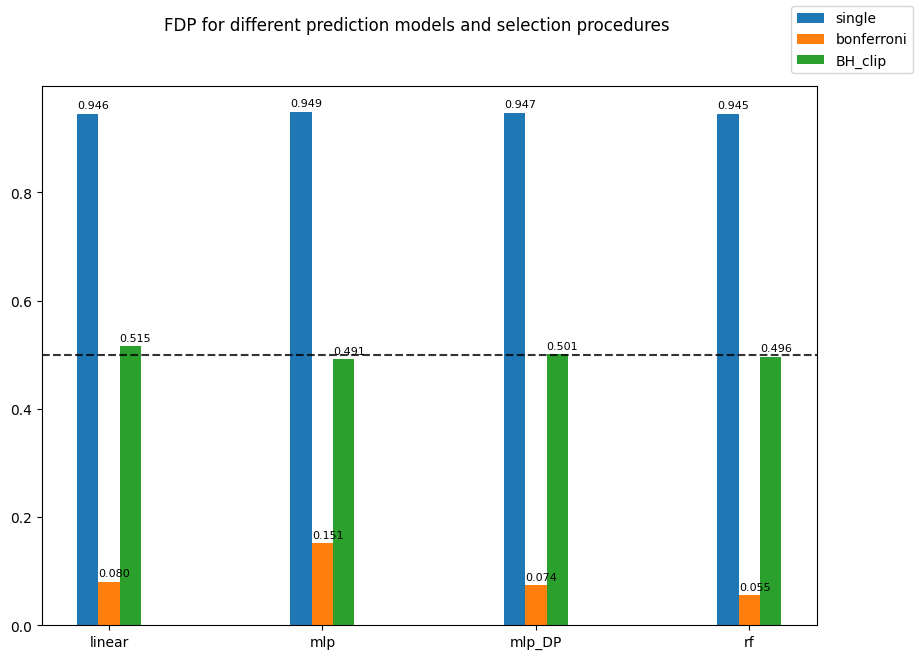

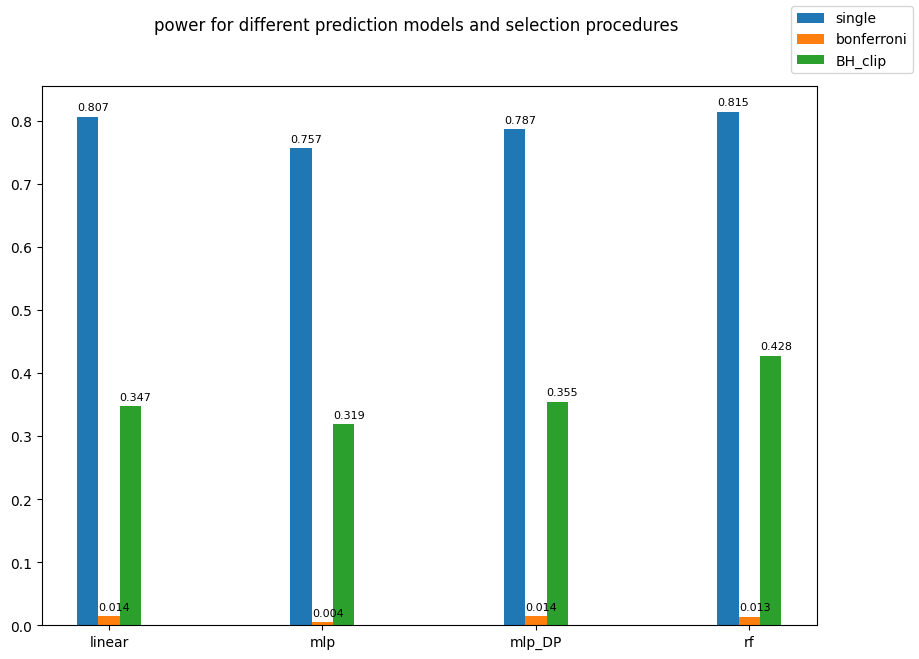

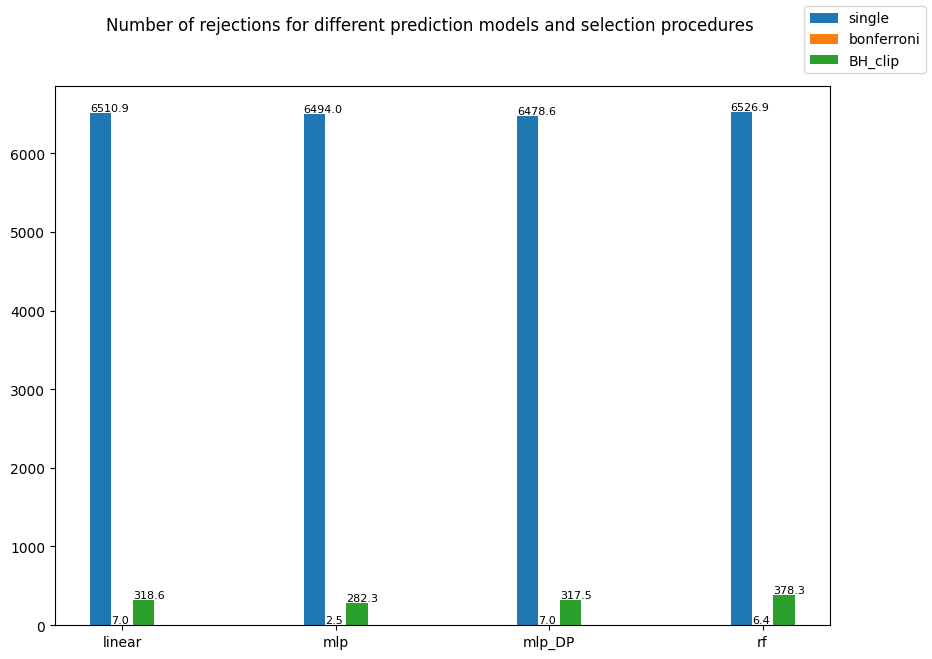

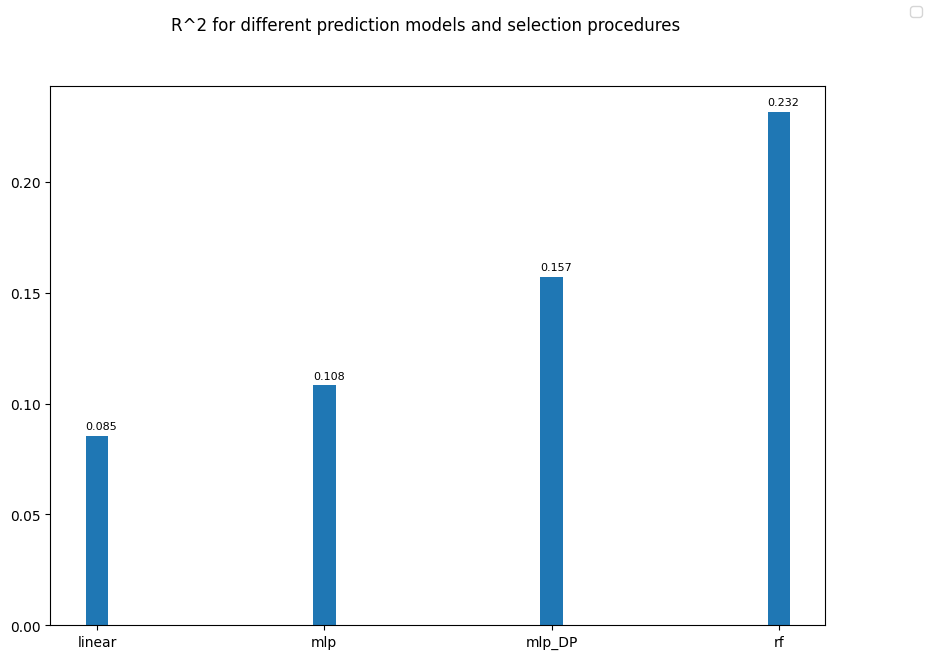

In [163]:
names = ['linear', 'mlp', 'mlp_DP', 'rf']
targets = ['fdp', 'power', 'nsel', 'r_squared']
targets_name = ['FDP', 'power', 'Number of rejections', 'R^2']

for idx, target in enumerate(targets):
    fig, ax = plt.subplots(figsize=(10, 7))
    BH_res = []
    BH_sub = []
    BH_clip = []
    bonf = []
    single = []
    r_sq = []
    for reg in names:
        if target != 'r_squared':
            BH_res.append(all[all['regressor'] == reg][f"BH_res_{target}"].values[0])
            BH_sub.append(all[all['regressor'] == reg][f"BH_sub_{target}"].values[0])
            BH_clip.append(all[all['regressor'] == reg][f"BH_clip_{target}"].values[0])
            bonf.append(all[all['regressor'] == reg][f"bonf_{target}"].values[0])
            single.append(all[all['regressor'] == reg][f"single_{target}"].values[0])
        else:
            r_sq.append(all[all['regressor'] == reg]['r_squared'].values[0])
    if target != 'r_squared':
        ax.bar(np.arange(len(names)) - 0.1, single, 0.1, label='single')
        ax.bar(np.arange(len(names)), bonf, 0.1, label='bonferroni')
        ax.bar(np.arange(len(names)) + 0.1, BH_clip, 0.1, label='BH_clip')
    else:
        ax.bar(np.arange(len(names)), r_sq, 0.1)
    if target == 'fdp':
        ax.axhline(0.5, linestyle='--', alpha=0.8, color='black')

    rects = ax.patches
    labels = []
    if target != 'r_squared' and target != 'nsel':
        for i in range(len(single)):
            labels.append("%.3f" % single[i])
        for i in range(len(bonf)):
            labels.append("%.3f" % bonf[i])
        for i in range(len(BH_clip)):
            labels.append("%.3f" % BH_clip[i])
    elif target == 'r_squared':
        for i in range(len(r_sq)):
            labels.append("%.3f" % r_sq[i])
    else:
        for i in range(len(single)):
            labels.append("%.1f" % single[i])
        for i in range(len(bonf)):
            labels.append("%.1f" % bonf[i])
        for i in range(len(BH_clip)):
            labels.append("%.1f" % BH_clip[i])

    offset = 0.01
    if target == 'r_squared':
        offset = 0.003
    if target == 'nsel':
        offset = 25

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x(), height + offset, label, fontsize=8
        )
    ax.set_xticks(np.arange(len(names)), names)
    fig.suptitle(f"{targets_name[idx]} for different prediction models and selection procedures")
    fig.legend()